# Project: Correlation between GDP and literacy rate
By Aya Tamura, 14th November 2023

Overall, there has been a noticeable improvement in global literacy rates over the years, with an increasing number of individuals acquiring the ability to read and write. This positive trend can be attributed to various factors, including developments of economy, enhanced access to education, improved literacy programs, and advancements in technology.

The purpose of this analysis is to determine whether there exists a correlation between a country's GDP and the corresponding literacy rate (expressed as a percentage of the youth population aged 15-24) in 2019 (before COVID-19 pandemic).

## Getting the data

Three datasets from the World Bank have been considered for analysis.

- The first dataset, which can be accessed at [GDP (current US$)](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD), provides information on the GDP in US dollars.

- The second dataset, which can be retrieved at [Population](https://data.worldbank.org/indicator/SP.POP.TOTL), indicates the total number of population.

- The third dataset, available at [Literacy rate, youth total (% of people ages 15-24)](http://data.worldbank.org/indicator/SE.ADT.1524.LT.ZS), presents the literacy rate, specifically the percentage of youth aged 15-24, for countries around the world.

In [56]:
# Import required libraries
import pandas as pd
import pandas_datareader

# Check if pandas version is 0.23
if pd.__version__.startswith('0.23'):
    # this solves an incompatibility between pandas 0.23 and datareader 0.6
    # taken from https://stackoverflow.com/questions/50394873/
    core.common.is_list_like = api.types.is_list_like

from pandas_datareader.wb import download

# Set variables
YEAR = 2019
GDP_INDICATOR = 'NY.GDP.MKTP.CD'
POP_INDICATOR = 'SP.POP.TOTL'
LIT_INDICATOR = 'SE.ADT.1524.LT.ZS'

# Download data using pandas_datareader and reset the index
gdpWB = download(indicator = GDP_INDICATOR, country = 'all', start = YEAR, end = YEAR).reset_index()
popWB = download(indicator = POP_INDICATOR, country = 'all', start = YEAR, end = YEAR).reset_index()
litWB = download(indicator = LIT_INDICATOR, country = 'all', start = YEAR, end = YEAR).reset_index()

## Cleaning the data

First, checking the shape of data.
Next, inspecting the data with `head()` and `tail()` shows that:

- The first 48 rows are aggregated data, for the Arab World, the Caribbean small states, and other country groups used by the World Bank.
- Both literacy rate and educational expenditure values are missing for many countries.

The data is therefore cleaned by:
- removing the first 48 rows.
- removing rows with unavailable values.

In [57]:
# Check the data shape
gdpWB.shape

(266, 3)

In [58]:
popWB.shape

(266, 3)

In [59]:
litWB.shape

(266, 3)

It appears that the number of rows in the literacy rate data is 42, which is significantly smaller than the other two datasets. The missing data is not random and could introduce bias into the correlation analysis. This non-random missing data merits mention as a limitation of the analysis later on.

In [60]:
# Display the first 50 rows of the exEdWB DataFrame
gdpWB.head(50)

,country,year,NY.GDP.MKTP.CD
0,Africa Eastern and Southern,2019,1.000834e+12
1,Africa Western and Central,2019,8.225384e+11
2,Arab World,2019,2.868891e+12
3,Caribbean small states,2019,7.728280e+10
4,Central Europe and the Baltics,2019,1.674114e+12
5,Early-demographic dividend,2019,1.169625e+13
6,East Asia & Pacific,2019,2.702400e+13
7,East Asia & Pacific (excluding high income),2019,1.720713e+13
8,East Asia & Pacific (IDA & IBRD countries),2019,1.718566e+13
9,Euro area,2019,1.341836e+13


In [61]:
# Select the data for countries starting from index 49 and drop any rows with missing values
gdpWB = gdpWB[49:].dropna()
popWB = popWB[49:].dropna()
litWB = litWB[49:].dropna()

In [62]:
# Retrieve the shape of the DataFrame
gdpWB.shape
gdpWB

,country,year,NY.GDP.MKTP.CD
49,Afghanistan,2019,1.890450e+10
50,Albania,2019,1.540183e+10
51,Algeria,2019,1.717603e+11
52,American Samoa,2019,6.470000e+08
53,Andorra,2019,3.155149e+09
...,...,...,...
260,Viet Nam,2019,3.343653e+11
261,Virgin Islands (U.S.),2019,4.117000e+09
262,West Bank and Gaza,2019,1.713350e+10
264,Zambia,2019,2.330867e+10


In [63]:
popWB.shape
popWB

,country,year,SP.POP.TOTL
49,Afghanistan,2019,37769499.0
50,Albania,2019,2854191.0
51,Algeria,2019,42705368.0
52,American Samoa,2019,47321.0
53,Andorra,2019,76343.0
...,...,...,...
261,Virgin Islands (U.S.),2019,106669.0
262,West Bank and Gaza,2019,4685306.0
263,"Yemen, Rep.",2019,31546691.0
264,Zambia,2019,18380477.0


In [64]:
litWB.shape

(42, 3)

## Transforming the data

The World Bank reports GDP figures in US dollars and cents. To facilitate readability, the GDP data is converted to millions of British pounds sterling (the author's domestic currency) with the following auxiliary functions, utilizing the average 2019 dollar-to-pound conversion rate provided by <http://www.ukforex.co.uk/forex-tools/historical-rate-tools/yearly-average-rates>. 

In [65]:
def roundToMillions (value):
    return round(value / 1000000)

def usdToGBP (usd):
    return usd * 0.783652

In [66]:
GDP = 'GDP'
gdpWB[GDP] = gdpWB[GDP_INDICATOR].apply(usdToGBP)
gdpWB.head()

,country,year,NY.GDP.MKTP.CD,GDP
49,Afghanistan,2019,1.890450e+10,1.481455e+10
50,Albania,2019,1.540183e+10,1.206967e+10
51,Algeria,2019,1.717603e+11,1.346003e+11
52,American Samoa,2019,6.470000e+08,5.070228e+08
53,Andorra,2019,3.155149e+09,2.472539e+09


The unnecessary columns should be dropped.

In [67]:
COUNTRY = 'country'
headings = [COUNTRY, GDP]
gdpClean = gdpWB[headings]
gdpClean.head()

,country,GDP
49,Afghanistan,1.481455e+10
50,Albania,1.206967e+10
51,Algeria,1.346003e+11
52,American Samoa,5.070228e+08
53,Andorra,2.472539e+09


In [68]:
POP = 'population'
popWB[POP] = popWB[POP_INDICATOR]
headings = [COUNTRY, POP]
popClean = popWB[headings]
popClean.head(10)

,country,population
49,Afghanistan,37769499.0
50,Albania,2854191.0
51,Algeria,42705368.0
52,American Samoa,47321.0
53,Andorra,76343.0
54,Angola,32353588.0
55,Antigua and Barbuda,92117.0
56,Argentina,44938712.0
57,Armenia,2820602.0
58,Aruba,106442.0


In [69]:
LIT = 'literacy rate (%)'
litWB[LIT] = litWB[LIT_INDICATOR]
headings = [COUNTRY, LIT]
litClean = litWB[headings]
litClean.head(10)


,country,literacy rate (%)
51,Algeria,74.029999
61,Azerbaijan,99.933929
64,Bangladesh,94.862427
66,Belarus,99.872833
72,Bolivia,99.529999
75,Brazil,99.099998
79,Burkina Faso,47.046249
86,Central African Republic,20.760000
87,Chad,31.750000
91,Colombia,98.830002


## Combining the data

The tables are combined through an inner join on the shared 'country' column. First, the GDP and population data are merged with the goal of calculating GDP per capita.

In [70]:
gdpVsPop = pd.merge(gdpClean, popClean, on=COUNTRY, how='inner')
gdpVsPop.head()

,country,GDP,population
0,Afghanistan,1.481455e+10,37769499.0
1,Albania,1.206967e+10,2854191.0
2,Algeria,1.346003e+11,42705368.0
3,American Samoa,5.070228e+08,47321.0
4,Andorra,2.472539e+09,76343.0


In [71]:
GDPCPT = 'GDP per capita (GBP)'
gdpVsPop[GDPCPT] = gdpVsPop[GDP] / gdpVsPop[POP]
gdpVsPop.head()


,country,GDP,population,GDP per capita (GBP)
0,Afghanistan,1.481455e+10,37769499.0,392.235835
1,Albania,1.206967e+10,2854191.0,4228.754071
2,Algeria,1.346003e+11,42705368.0,3151.835498
3,American Samoa,5.070228e+08,47321.0,10714.542043
4,Andorra,2.472539e+09,76343.0,32387.240439


Then combine with the literacy rate table.

In [72]:
gdpVsLit = pd.merge(gdpVsPop, litClean, on = COUNTRY, how = 'inner')
gdpVsLit.head(10)

,country,GDP,population,GDP per capita (GBP),literacy rate (%)
0,Algeria,1.346003e+11,42705368.0,3151.835498,74.029999
1,Azerbaijan,3.775184e+10,10024283.0,3766.038512,99.933929
2,Bangladesh,2.752487e+11,165516222.0,1662.970971,94.862427
3,Belarus,5.047511e+10,9419758.0,5358.429967,99.872833
4,Bolivia,3.204770e+10,11777315.0,2721.138183,99.529999
5,Brazil,1.468006e+12,211782878.0,6931.655789,99.099998
6,Burkina Faso,1.267805e+10,20951639.0,605.110118,47.046249
7,Central African Republic,1.740727e+09,5209324.0,334.156072,20.760000
8,Chad,8.866984e+09,16126866.0,549.826857,31.750000
9,Colombia,2.531444e+11,50187406.0,5043.983320,98.830002


## Calculating the correlation

To measure if the literacy rate and the GDP per capita grow together, the Spearman rank correlation coefficient is used. It is a number from -1 (perfect inverse rank correlation: if one indicator increases, the other decreases) to 1 (perfect direct rank correlation: if one indicator increases, so does the other), with 0 meaning there is no rank correlation. A perfect correlation doesn't imply any cause-effect relation between the two indicators. A p-value below 0.05 means the correlation is statistically significant.

In [73]:
from scipy.stats import spearmanr

gdpColumn = gdpVsLit[GDPCPT]
litColumn = gdpVsLit[LIT]
(correlation, pValue) = spearmanr(gdpColumn, litColumn)
print('The correlation is', correlation)
if pValue < 0.05:
    print('It is statistically significant.')
else:
    print('It is not statistically significant.')

The correlation is 0.6852767198768334
It is statistically significant.


The value shows a direct correlation, i.e. richer countries tend to have higher literacy rate, but it is not very strong.

## Showing the data

Measures of correlation can offer an incomplete picture, so it is best to examine the overall trend via a scatterplot. The GDP per capita axis employs a logarithmic scale to more effectively showcase the immense range of GDP per capita values, from a few thousand pounds to several tens of thousands of pounds.

<Axes: xlabel='GDP per capita (GBP)', ylabel='literacy rate (%)'>

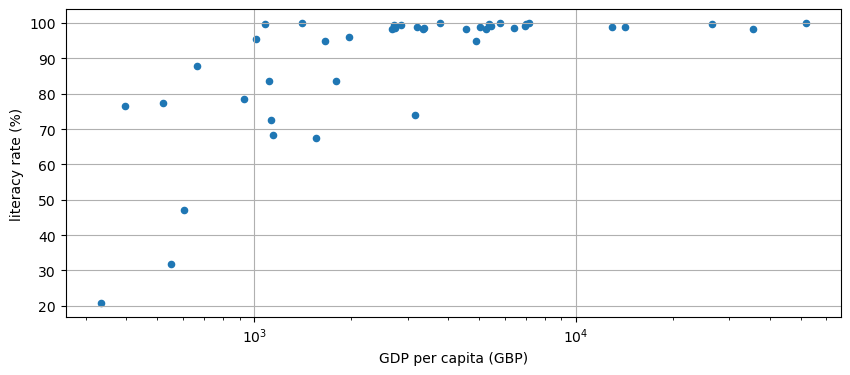

In [74]:
%matplotlib inline
gdpVsLit.plot(x=GDPCPT, y=LIT, kind='scatter', grid=True, logx=True, figsize=(10, 4))

The plot shows that there is an increasing trend in the values of literacy rate as GDP per capita increases, up to a certain point where GDP per capita reaches a maximum value and remains constant. Some nations with approximately one thousand million pounds GDP per capita attained nearly 100% literacy rates, whereas other countries lingered around 70% literacy. This implies a potential threshold or saturation point in the linkage between GDP per capita and literacy rate.

In [75]:
# the 10 countries with lowest GDP per capita
gdpVsLit.sort_values(GDPCPT).head(10)

,country,GDP,population,GDP per capita (GBP),literacy rate (%)
7,Central African Republic,1.740727e+09,5209324.0,334.156072,20.760000
30,Sierra Leone,3.194619e+09,8046828.0,397.003517,76.529999
18,Liberia,2.601408e+09,4985289.0,521.816977,77.460007
8,Chad,8.866984e+09,16126866.0,549.826857,31.750000
6,Burkina Faso,1.267805e+10,20951639.0,605.110118,47.046249
34,Togo,5.479809e+09,8243094.0,664.775774,87.891441
20,Nepal,2.679007e+10,28832496.0,929.162320,78.629997
19,Myanmar,5.383514e+10,53040212.0,1014.987236,95.415123
16,Kyrgyz Republic,6.951792e+09,6456200.0,1076.762248,99.699997
41,Zimbabwe,1.710887e+10,15354608.0,1114.250169,83.720001


In [76]:
# the 10 countries with highest literacy rate
gdpVsLit.sort_values(LIT).head(10)

,country,GDP,population,GDP per capita (GBP),literacy rate (%)
7,Central African Republic,1.740727e+09,5209324.0,334.156072,20.760000
8,Chad,8.866984e+09,16126866.0,549.826857,31.750000
6,Burkina Faso,1.267805e+10,20951639.0,605.110118,47.046249
27,Sao Tome and Principe,3.349525e+08,214599.0,1560.829674,67.589996
28,Senegal,1.834059e+10,16000781.0,1146.230816,68.279999
21,Pakistan,2.514814e+11,223293280.0,1126.237880,72.703560
0,Algeria,1.346003e+11,42705368.0,3151.835498,74.029999
30,Sierra Leone,3.194619e+09,8046828.0,397.003517,76.529999
18,Liberia,2.601408e+09,4985289.0,521.816977,77.460007
20,Nepal,2.679007e+10,28832496.0,929.162320,78.629997


In [77]:
lower60 = gdpVsLit[gdpVsLit[LIT]<=80]
lower60.sort_values(GDPCPT, ascending=False)

,country,GDP,population,GDP per capita (GBP),literacy rate (%)
0,Algeria,1.346003e+11,42705368.0,3151.835498,74.029999
27,Sao Tome and Principe,3.349525e+08,214599.0,1560.829674,67.589996
28,Senegal,1.834059e+10,16000781.0,1146.230816,68.279999
21,Pakistan,2.514814e+11,223293280.0,1126.237880,72.703560
20,Nepal,2.679007e+10,28832496.0,929.162320,78.629997
6,Burkina Faso,1.267805e+10,20951639.0,605.110118,47.046249
8,Chad,8.866984e+09,16126866.0,549.826857,31.750000
18,Liberia,2.601408e+09,4985289.0,521.816977,77.460007
30,Sierra Leone,3.194619e+09,8046828.0,397.003517,76.529999
7,Central African Republic,1.740727e+09,5209324.0,334.156072,20.760000


## Conclusions

To summarize, the analysis indicates a moderate positive yet not robust correlation between a nation's wealth and its literacy rate (the percentage of youth aged 15-24 who can read and write). There tends to be considerable diversity in literacy rates for countries possessing similar GDP per capita levels. However, places with a GDP per capita exceeding 10 thousand pounds consistently attained nearly 100% literacy.
This examination is restricted because literacy rate figures are only accessible for 42 nations, while corresponding data for over 160 countries is absent.